In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. time course data on tumor growth

In [2]:
url="https://github.com/xfreppihs/lab_data_analysis/blob/master/mouse_tumor_xenograft/B1_B9.xlsx?raw=true"
data=pd.read_excel(url)
data.head()

,Unnamed: 0,date,weight (g),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,B1,2017-06-13 00:00:00,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B2,2017-06-13 00:00:00,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B3,2017-06-13 00:00:00,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B4,2017-06-13 00:00:00,24.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B5,2017-06-13 00:00:00,21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# select only IVIS data
idata = data[['Unnamed: 0','date','Unnamed: 3','Unnamed: 4']]
idata.head()

,Unnamed: 0,date,Unnamed: 3,Unnamed: 4
0,B1,2017-06-13 00:00:00,NaN,NaN
1,B2,2017-06-13 00:00:00,NaN,NaN
2,B3,2017-06-13 00:00:00,NaN,NaN
3,B4,2017-06-13 00:00:00,NaN,NaN
4,B5,2017-06-13 00:00:00,NaN,NaN


In [4]:
# remove NaN
idata.dropna(inplace = True)
idata.head()

<ipython-input-4-a6527fe07297>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata.dropna(inplace = True)


,Unnamed: 0,date,Unnamed: 3,Unnamed: 4
10,B1,2017-06-15 00:00:00,10270000,55130000
11,B2,2017-06-15 00:00:00,51890000,66210000
12,B3,2017-06-15 00:00:00,55170000,30940000
13,B4,2017-06-15 00:00:00,48380000,74310000
14,B5,2017-06-15 00:00:00,27340000,60090000


In [5]:
# rename columns
idata.set_axis(['id','date','left','right'],axis = 'columns',inplace = True)
idata.head()

,id,date,left,right
10,B1,2017-06-15 00:00:00,10270000,55130000
11,B2,2017-06-15 00:00:00,51890000,66210000
12,B3,2017-06-15 00:00:00,55170000,30940000
13,B4,2017-06-15 00:00:00,48380000,74310000
14,B5,2017-06-15 00:00:00,27340000,60090000


In [6]:
idata_melt = pd.melt(idata, id_vars=['id','date'], value_vars=['left', 'right'])
idata_melt

,id,date,variable,value
0,B1,2017-06-15,left,10270000
1,B2,2017-06-15,left,51890000
2,B3,2017-06-15,left,55170000
3,B4,2017-06-15,left,48380000
4,B5,2017-06-15,left,27340000
5,B6,2017-06-15,left,58690000
6,B1,2017-06-19,left,115800000
7,B2,2017-06-19,left,468700000
8,B3,2017-06-19,left,556600000
9,B4,2017-06-19,left,196300000


In [7]:
# convert 'value' to numbers, 'date' to strings
idata_melt['value'] = idata_melt['value'].astype(float)
idata_melt['date'] = idata_melt['date'].astype(str)

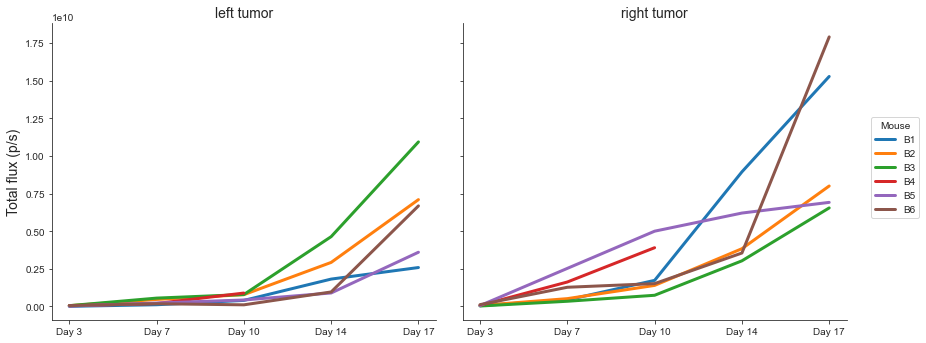

In [8]:
sns.set_style('ticks') # can choose from white, dark, whitegrid, darkgrid, ticks
g1 = sns.FacetGrid(idata_melt, col='variable', hue = 'id', height = 5, aspect = 1.2) # create facetgrid canvas
#g1.fig.set_figwidth(12) # another way to set figure size
#g1.fig.set_figheight(5)

g1 = g1.map(sns.lineplot, 'date', 'value', lw = 3) # draw line plot

g1.set_titles(col_template="{col_name} tumor",size = 14) # add title to each grid

g1.set_axis_labels('', 'Total flux (p/s)' ,size = 14) # remove or change axis labels

xlabels = ['Day 3', 'Day 7', 'Day 10', 'Day 14', 'Day 17'] 
g1.set_xticklabels(xlabels) # change x-axis tick labels

axes = g1.axes.flatten() # access to individual plot
handle, label = axes[0].get_legend_handles_labels()
axes[1].legend(handles=handle, labels=label, title = 'Mouse', bbox_to_anchor=(1.05, 0.7)) # add customized legend box
#g1.add_legend() # alternatively, add legend directly, but this will only have a default style

FacetGrid methods see https://seaborn.pydata.org/generated/seaborn.FacetGrid.html  
axes methods see https://matplotlib.org/3.2.1/api/axes_api.html

In [9]:
# select only volume data
vdata = data[['Unnamed: 0','date','Unnamed: 7','Unnamed: 10']]
vdata.head()

,Unnamed: 0,date,Unnamed: 7,Unnamed: 10
0,B1,2017-06-13 00:00:00,NaN,NaN
1,B2,2017-06-13 00:00:00,NaN,NaN
2,B3,2017-06-13 00:00:00,NaN,NaN
3,B4,2017-06-13 00:00:00,NaN,NaN
4,B5,2017-06-13 00:00:00,NaN,NaN


In [10]:
# remove NaN
vdata.dropna(inplace = True)
vdata.head()

<ipython-input-10-e4d5ceb43dd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdata.dropna(inplace = True)


,Unnamed: 0,date,Unnamed: 7,Unnamed: 10
30,B1,2017-06-22 00:00:00,147.253,108.749
31,B2,2017-06-22 00:00:00,216.212,232.359
32,B3,2017-06-22 00:00:00,126.703,297.977
33,B4,2017-06-22 00:00:00,232.078,614.967
34,B5,2017-06-22 00:00:00,202.615,368.527


In [11]:
# rename columns
vdata.set_axis(['id','date','left','right'],axis = 'columns',inplace = True)
vdata.head()

,id,date,left,right
30,B1,2017-06-22 00:00:00,147.253,108.749
31,B2,2017-06-22 00:00:00,216.212,232.359
32,B3,2017-06-22 00:00:00,126.703,297.977
33,B4,2017-06-22 00:00:00,232.078,614.967
34,B5,2017-06-22 00:00:00,202.615,368.527


In [12]:
vdata_melt = pd.melt(vdata, id_vars=['id','date'], value_vars=['left', 'right'])
vdata_melt

,id,date,variable,value
0,B1,2017-06-22,left,147.253
1,B2,2017-06-22,left,216.212
2,B3,2017-06-22,left,126.703
3,B4,2017-06-22,left,232.078
4,B5,2017-06-22,left,202.615
5,B6,2017-06-22,left,77.7219
6,B1,2017-06-26,left,172.591
7,B2,2017-06-26,left,177.083
8,B3,2017-06-26,left,181.959
9,B5,2017-06-26,left,227.389


In [13]:
# convert 'value' to numbers, 'date' to strings
vdata_melt['value'] = vdata_melt['value'].astype(float)
vdata_melt['date'] = vdata_melt['date'].astype(str)

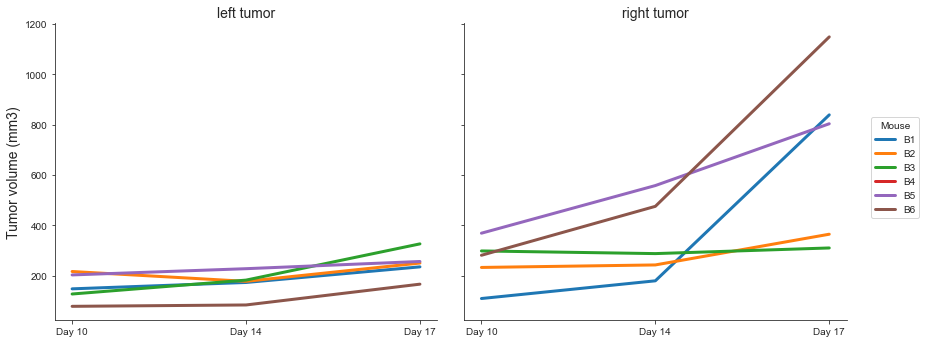

In [14]:
sns.set_style('ticks') # can choose from white, dark, whitegrid, darkgrid, ticks
g3 = sns.FacetGrid(vdata_melt, col='variable', hue = 'id', height = 5, aspect = 1.2) # create facetgrid canvas
#g3.fig.set_figwidth(12) # another way to set figure size
#g3.fig.set_figheight(5)

g3 = g3.map(sns.lineplot, 'date', 'value', lw = 3) # draw line plot

g3.set_titles(col_template="{col_name} tumor",size = 14) # add title to each grid

g3.set_axis_labels('', 'Tumor volume (mm3)' ,size = 14) # remove or change axis labels

xlabels2 = ['Day 10', 'Day 14', 'Day 17'] 
g3.set_xticklabels(xlabels2) # change x-axis tick labels

axes = g3.axes.flatten() # access to individual plot
handle, label = axes[0].get_legend_handles_labels()
axes[1].legend(handles=handle, labels=label, title = 'Mouse', bbox_to_anchor=(1.05, 0.7)) # add customized legend box
#g3.add_legend() # alternatively, add legend directly, but this will only have a default style

2. tumor volume data on each cell line

In [15]:
url2 = "https://github.com/xfreppihs/lab_data_analysis/blob/master/mouse_tumor_xenograft/B10_B74.xlsx?raw=true"
data2 = pd.read_excel(url2)
data2.head()

,ID,cell_line,volume,group
0,B25,rSCC61,179.812813,5
1,B26,rSCC61,169.372175,2
2,B27,rSCC61,179.681898,4
3,B28,rSCC61,165.902013,1
4,B29,rSCC61,202.898808,1


C:\Users\chenx\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chenx\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


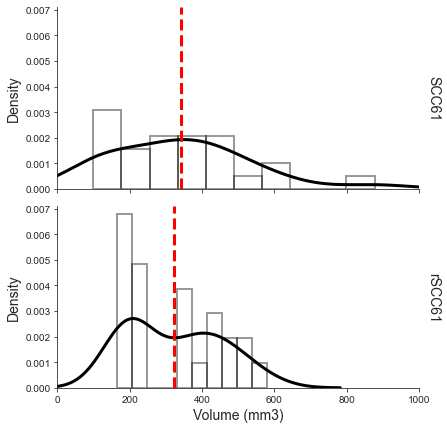

In [16]:
sns.set_style('ticks') # can choose from white, dark, whitegrid, darkgrid, ticks
g2 = sns.FacetGrid(data2, row='cell_line', height = 3, aspect = 2, margin_titles = True, row_order = ['SCC61', 'rSCC61'], 
                   xlim = (0,1000)) # create facetgrid canvas

g2 = g2.map(sns.distplot, 'volume', bins = 10, kde_kws={"color": "black", "lw": 3}, 
            hist_kws={'lw': 2, 'fill': False, 'edgecolor':'black'}) # draw dist plot

g2.set_titles(row_template="{row_name}",size = 14) # add title to each grid

g2.set_axis_labels('Volume (mm3)', 'Density', size = 14) # change axis labels

axes= g2.axes.flatten() # add vertical lines for the means
axes[0].axvline(data2[data2['cell_line']=='SCC61']['volume'].mean(), ls='--', lw = 3, c = 'r')
axes[1].axvline(data2[data2['cell_line']=='rSCC61']['volume'].mean(), ls='--', lw = 3, c = 'r')

Using distplot, I was not able to set bin size the same between the grids. But the advantage is the ability to customize the hist_kws and kde_kws.

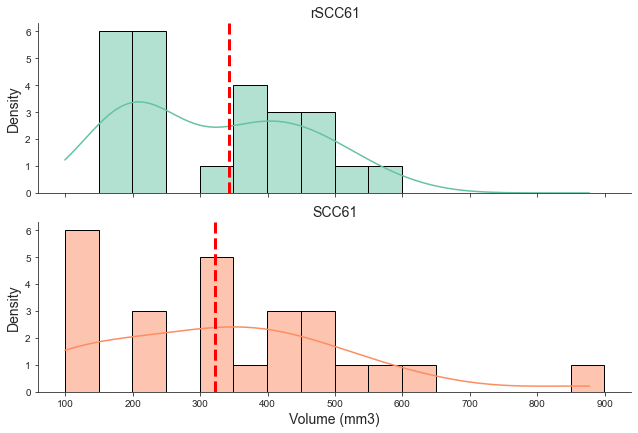

In [30]:
sns.set_style('ticks') # can choose from white, dark, whitegrid, darkgrid, ticks

g2 = sns.displot(data = data2, x = 'volume', row = 'cell_line', binwidth = 50, kde = True, alpha = 0.5, color = 'grey', 
                 edgecolor = 'black', height = 3, aspect = 3, row_order = ['SCC61', 'rSCC61'], hue = 'cell_line', 
                 palette = 'Set2') # draw displot
    
g2.set_titles(row_template="{row_name}",size = 14) # add title to each grid

g2.set_axis_labels('Volume (mm3)', 'Density', size = 14) # change axis labels

g2._legend.remove() # remove legend

axes= g2.axes.flatten() # add vertical lines for the means
axes[0].axvline(data2[data2['cell_line']=='SCC61']['volume'].mean(), ls='--', lw = 3, c = 'r')
axes[1].axvline(data2[data2['cell_line']=='rSCC61']['volume'].mean(), ls='--', lw = 3, c = 'r')

Using displot to unify the binwidth between grids are easy, but I was not able to change the order of the grids. The color theme of the histogram and kde line is hard to change, too.

In [ ]:
fig, axes = plt.subplots(nrows = 2,ncols = 1, figsize=(6,9))
sns.distplot(data2[data2['cell_line']=='SCC61']['volume'], ax = axes[0], bins = 10, kde_kws={"color": "black", "lw": 3}, 
            hist_kws={'lw': 2, 'fill': False, 'edgecolor':'black'})
sns.distplot(data2[data2['cell_line']=='rSCC61']['volume'], ax = axes[1], bins = 5, kde_kws={"color": "black", "lw": 3}, 
            hist_kws={'lw': 2, 'fill': False, 'edgecolor':'black'})
# another way to access individual axis is to assign sns.distplot directly to an object (like axes = sns.distplot())
axes[0].set_xlim(0,1000)
axes[0].set_xlabel('Volume (mm3)', size = 14)
axes[0].set_ylabel('Density', size = 14)
axes[0].set_title('SCC-61', size = 14)
axes[1].set_xlim(0,1000)
axes[1].set_xlabel('Volume (mm3)', size = 14)
axes[1].set_ylabel('Density', size = 14)
axes[1].set_title('rSCC-61', size = 14)
plt.tight_layout()
axes[0].axvline(data2[data2['cell_line']=='SCC61']['volume'].mean(), ls='--', lw = 3, c = 'r')
axes[1].axvline(data2[data2['cell_line']=='rSCC61']['volume'].mean(), ls='--', lw = 3, c = 'r')

Here I started plotting subplots individually instead of using a FacetGrid, but controlling distplot bins instead of binwidth is still difficult and not ideal.

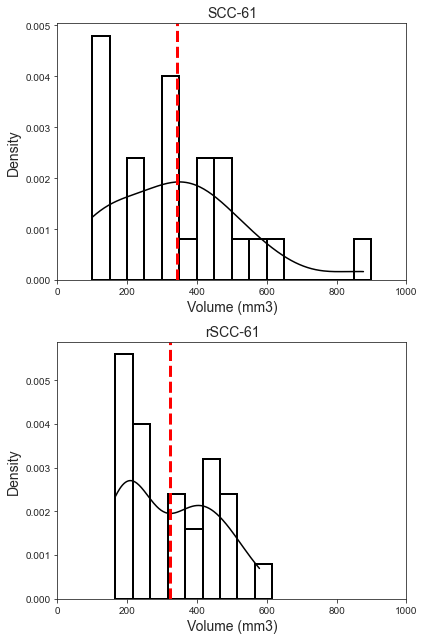

In [21]:
fig, axes = plt.subplots(nrows = 2,ncols = 1, figsize=(6,9))
sns.histplot(data = data2[data2['cell_line']=='SCC61'], x = 'volume', ax = axes[0], binwidth = 50, kde = True, fill = False, 
             color = 'black', lw = 2, stat = 'density')
sns.histplot(data = data2[data2['cell_line']=='rSCC61'], x = 'volume', ax = axes[1], binwidth = 50, kde = True, fill = False, 
             color = 'black', lw = 2, stat = 'density')
# another way to access individual axis is to assign sns.histplot directly to an object (like axes = sns.histplot())
axes[0].set_xlim(0,1000)
axes[0].set_xlabel('Volume (mm3)', size = 14)
axes[0].set_ylabel('Density', size = 14)
axes[0].set_title('SCC-61', size = 14)
axes[1].set_xlim(0,1000)
axes[1].set_xlabel('Volume (mm3)', size = 14)
axes[1].set_ylabel('Density', size = 14)
axes[1].set_title('rSCC-61', size = 14)
plt.tight_layout()
axes[0].axvline(data2[data2['cell_line']=='SCC61']['volume'].mean(), ls='--', lw = 3, c = 'r')
axes[1].axvline(data2[data2['cell_line']=='rSCC61']['volume'].mean(), ls='--', lw = 3, c = 'r')

Plotting individual subplots as histplot solves the binwidth problem, but the kde line does not extend fully.

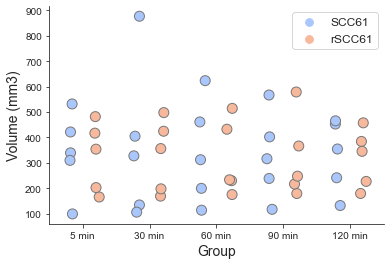

In [24]:
axes = sns.stripplot(data = data2, x = 'group', y = 'volume', hue = 'cell_line', linewidth = 1, dodge = True, size = 10,
                    hue_order = ['SCC61', 'rSCC61'], palette = 'coolwarm')
axes.set_xlabel('Group', size = 14) # or plt.xlabel('Group', size = 14)
axes.set_ylabel('Volume (mm3)', size = 14) # or plt.ylabel('Volume (mm3)', size = 14)
axes.set_xticklabels(['5 min', '30 min', '60 min', '90 min', '120 min']) # or plt.xticks((0,1,2,3,4),('5 min', '30 min', '60 min', '90 min', '120 min'))
axes.legend(frameon = True, fontsize = 12) # or plt.legend(frameon = True, fontsize = 12)
sns.despine()